# Lecture 5 : Data manipulation in Python

*November, 2021 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

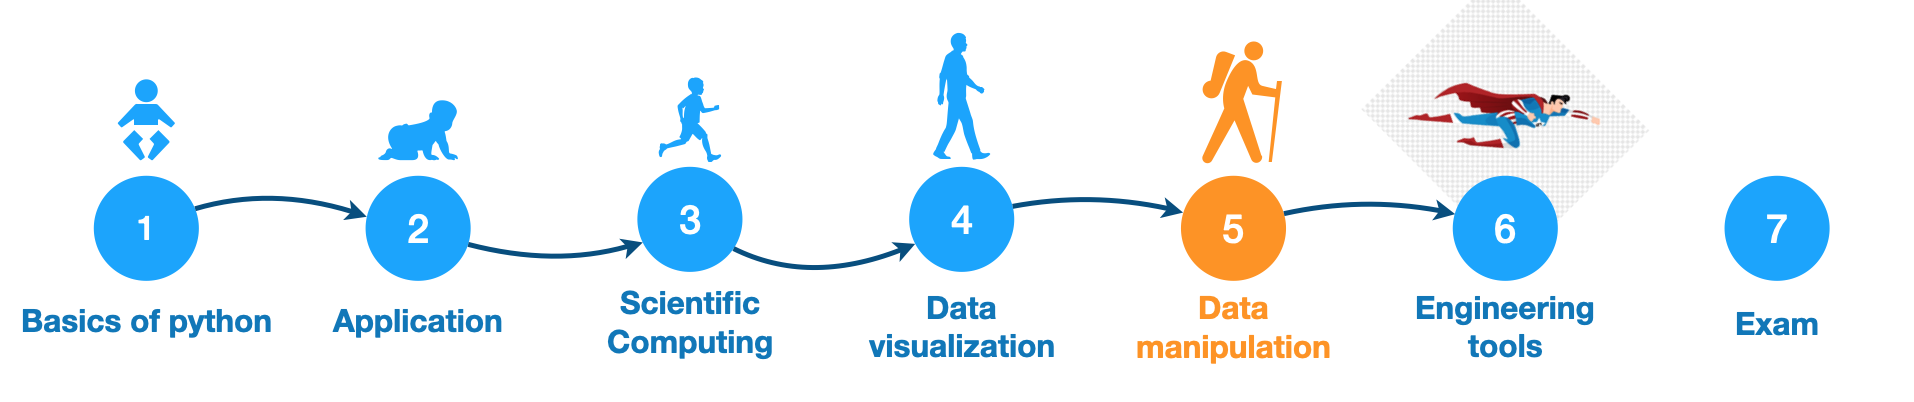

[General introduction](#I)

1. [Introduction to DataFrames](#1)
2. [Data representation](#2)
3. [Data manipulation](#3)
3. [Descriptive statistics with Pandas](#4)
4. [Data visualization with Pandas](#5)

[Exercices](#E)

# General introduction (a little long) <a name="I"></a>

Data can be represented in various forms: [txt](https://en.wikipedia.org/wiki/Text_file), [csv](https://en.wikipedia.org/wiki/Comma-separated_values), [xls](https://en.wikipedia.org/wiki/Microsoft_Excel#File_formats) (excel), [json](https://en.wikipedia.org/wiki/JSON), ... . In python, given a specific extension (.txt for example), we have many adequate modules for importing data. For "classical" files such as txt files, Python has some useful built-in commands for importing and handling them: we can open for example a txt file as **write** or **read** mode with the command `open`.

### Write and add mode

The information is always written in the form of strings and always added at the end of the file, which grows until all the information is written. The writing is always done according to the following same scheme.

1. **creation or opening of the file**: when the file is opened, the file in which the information will be written is created if it does not exist or cleaned up if it already exists;
2. **writing** thanks to the **method `write`** of `f` (`TextIOWrapper` object);
3. **closing**: closing allows other programs to read what you have placed in this file.

In [1]:
# if we want to write in a .txt file in Python

# "w" is for write mode, we import the file "file_name.txt" as f and after the "with" block, the program close automatically
with open ("file_name.txt", "w") as f:    
    f.write("writing whatever I want in this file...")
    f.write("and adding another information. ")
    f.write("Let us skip two lines: \n\n")
    f.write("Let us add tabulates: \t\t")
    f.write("End.\n")

In [2]:
# "a" is for add mode, in the same file "file_name.txt", let us add more informations
with open ("file_name.txt", "a") as f:    
    f.write("\nAdding an information without erasing the previous informations")

### read mode

The reading of a file allows to find the stored information. It takes place according to the same principle, namely :

1. **opening** the file in read mode;

2. **reading** directly **iterating over** the file object or using the **`readlines` method**;

3. **closing**.

However, there is a difference when reading a file: it is done line by line, whereas writing does not necessarily follow a line-by-line division.

In [3]:
# if we want to read in a .txt file in Python

with open ("file_name.txt", "r") as f:
    for ligne in f:
        print(ligne)

writing whatever I want in this file...and adding another information. Let us skip two lines: 



Let us add tabulates: 		End.



Adding an information without erasing the previous informations


**Remark:** the `with` command handles the opening and the closing processes. Alternatively (although not recommended) we can write (for write mode):
```
f = open ("file_name.txt", "w") # opening
...                             # writing
...                             # writing
f.close ()                      # closing
```

### external packages

With the above Python built-in processes, importing and manipulating more "complex" types of data becomes too hard. For instance, let us import a `csv` file with the above method and store the values in a list. You can download the `iris` dataset [here](https://curiousml.github.io/teaching/epita-python/Iris.csv). Iris dataset is one of the best known toy database in the pattern recognition literature. The dataset contains 3 classes (of 50 instances each):
- `"Iris-setosa"`;
- `"Iris-versicolor"`;
- and `"Iris-virginica"`

Each class refers to a type of iris plant.

In [4]:
table = []
with open ("data/iris.csv", "r") as f:
    table = f.readlines()
    ##equivalently you can write ...
    #for lines in f: 
    #   table.append(lines)

table[:5] # let's look at the first 5 rows

['Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n',
 '1,5.1,3.5,1.4,0.2,Iris-setosa\n',
 '2,4.9,3.0,1.4,0.2,Iris-setosa\n',
 '3,4.7,3.2,1.3,0.2,Iris-setosa\n',
 '4,4.6,3.1,1.5,0.2,Iris-setosa\n']

As you can see, each line represent a string leading us to handle string objects instead of the wanted values. **In this case** it is recommended to use external packages.

## 1. Introduction to Dataframes <a name="1"></a>


This lecture explore how to represent and manipulate data and more preciselly [datasets](https://en.wikipedia.org/wiki/Data_set). Simply put, a dataset is just a collection of data often represented by **tables** where:
- each **column** of a table represents a variable (e.g. height, weight, age, grade, ...)
- and each **row** of a table represents an observation (just one case) of a variable.

The most well-known package in Python for handling efficiently data as a two-dimensional table is [pandas](https://pandas.pydata.org/) which provides a container for tables, called *Dataframe*.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables and index to observations;
- providing methods for visualization and descriptive statistics.

Like always, in a terminal (e.g. anaconda prompt), you can install the package `pandas` with the command:
```
pip install pandas
```
We note that pandas is frequently renamed as `pd`.

In [5]:
import pandas as pd

Below you will find the main differences between list, array and dataframe:

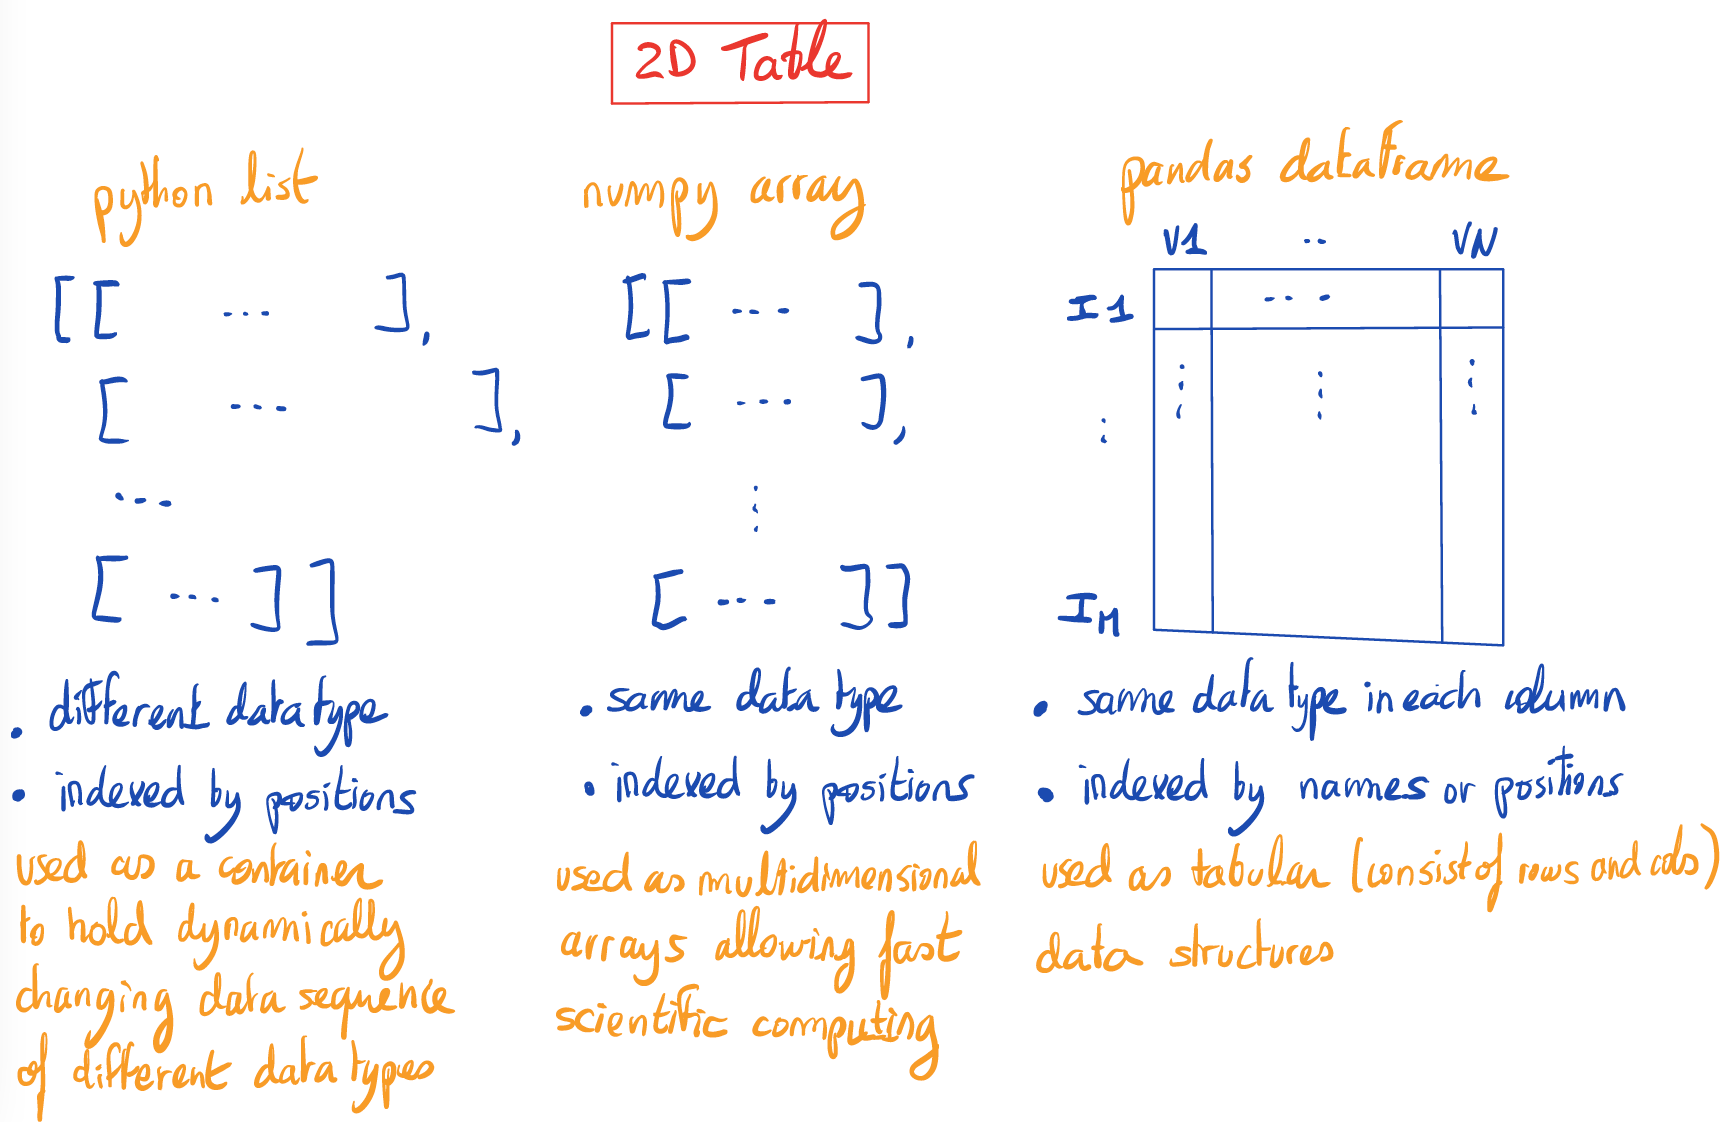

## 2. Data representation <a name="2"></a>

### Reading a dataframe

Reading an existing dataframe with the method `read_csv` (see documentation for more details).

In [6]:
# we gave the file path, how the values are separated in the file and the column chosen for being the observations index
iris = pd.read_csv('data/Iris.csv', sep=',', index_col="Id")
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Creating a dataframe

there are many ways for creating a dataframe from scratch:

1. specify the data (python list or numpy array), the index and the column
2. specify feature by feature (columns) thanks to a dictionary

In [7]:
import numpy as np

df1 = pd.DataFrame(data = np.random.rand(6,4),
                   index = ["u", "v", "w", "x", "y", "z"], # if not specified, it will be 0, 1, .. 5
                   columns = ["a", "b", "c", "d"]) # if not specified, it will be 0, 1, .. 5
df1

,a,b,c,d
u,0.038331,0.768922,0.916012,0.042691
v,0.240109,0.470671,0.262923,0.659971
w,0.923666,0.379960,0.594586,0.666815
x,0.431028,0.239062,0.145889,0.226571
y,0.155564,0.236447,0.302043,0.707633
z,0.349677,0.966427,0.663219,0.040674


In [8]:
df2 = pd.DataFrame({'a' : 1.,                                                           # Single item
                    'b' : "same",                                                       # Single item
                    'c' : np.random.rand(5),                                            # Multiple item
                    'd' : pd.Categorical(["test", "train", "train", "train", "test"])}) # Multiple item
df2

,a,b,c,d
0,1.0,same,0.498464,test
1,1.0,same,0.521439,train
2,1.0,same,0.409253,train
3,1.0,same,0.132740,train
4,1.0,same,0.418842,test


Like dictionaries, it is possible to add a new column (e.g. `column_name`) with values `values`:
```
df[column_name] = values
```

In [9]:
# let us add `e` to df1
df1['e'] = np.random.randint(0, 2, size=df1.shape[0])
df1

,a,b,c,d,e
u,0.038331,0.768922,0.916012,0.042691,0
v,0.240109,0.470671,0.262923,0.659971,1
w,0.923666,0.379960,0.594586,0.666815,0
x,0.431028,0.239062,0.145889,0.226571,0
y,0.155564,0.236447,0.302043,0.707633,0
z,0.349677,0.966427,0.663219,0.040674,1


### Viewing a dataframe

Instead of viewing the table in whole, pandas provides different methods for sneaking at it.

In [10]:
iris.head(n=3) # first 3 rows / observations of the table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [11]:
iris.tail(n=3) # last 3 rows / observations of the table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
iris.values[:3]  # values are in a numpy array (let us view only the first 3 rows)

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']], dtype=object)

Concerning the tables information, dataframe object contains many useful attributes:

In [13]:
# iris data

print(iris.index, end="\n\n")   # index of the table
print(iris.columns, end="\n\n") # columns of the table
print(iris.shape, end="\n\n")   # shape of the table
print(iris.dtypes, end="\n\n")  # data types of each variable

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', name='Id', length=150)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

(150, 5)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object



In [14]:
# df1 data

print(df1.index, end="\n\n")   # index of the table
print(df1.columns, end="\n\n") # columns of the table
print(df1.shape, end="\n\n")   # shape of the table
print(df1.dtypes, end="\n\n")  # data types of each variable

Index(['u', 'v', 'w', 'x', 'y', 'z'], dtype='object')

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

(6, 5)

a    float64
b    float64
c    float64
d    float64
e      int64
dtype: object



Or in a more compact way, the method:
- `info` gives **general information** concerning the dataframe and 
- `describe` gives **quantitative information** concerning the dataframe. 

In particular, info indicates the categorical variables (which are not treated by describe).

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


One can also sort the rows indices according to its name or a column's values

In [17]:
df1.sort_index(ascending=False)

,a,b,c,d,e
z,0.349677,0.966427,0.663219,0.040674,1
y,0.155564,0.236447,0.302043,0.707633,0
x,0.431028,0.239062,0.145889,0.226571,0
w,0.923666,0.379960,0.594586,0.666815,0
v,0.240109,0.470671,0.262923,0.659971,1
u,0.038331,0.768922,0.916012,0.042691,0


In [18]:
df1.sort_values(by='a')

,a,b,c,d,e
u,0.038331,0.768922,0.916012,0.042691,0
y,0.155564,0.236447,0.302043,0.707633,0
v,0.240109,0.470671,0.262923,0.659971,1
z,0.349677,0.966427,0.663219,0.040674,1
x,0.431028,0.239062,0.145889,0.226571,0
w,0.923666,0.379960,0.594586,0.666815,0


## 3. Data manipulation <a name="3"></a>

Let us consider the `iris` dataset as our toy dataset for this section. As a reminder:

In [19]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Updating row and column label

it is possible to rename the row and column labels

- **columns**

The DataFrame object has the attribute `columns`. We can reassign it easily with a list.

In [20]:
print(iris.columns)
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
print(iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')


- **rows**

For the row labels, the pandas DataFrame object offers many methods for updating it (see documentation with `help` command for more details about input arguments):
- `reset_index` which resets an index of a Data Frame. reset_index() method sets a list of integers ranging from 0 to length of data as an index;
- `set_index` which sets the DataFrame index (a.k.a row labels) using existing (one or more) columns;

and finally like columns, reassign the `index` attribute of the DataFrame object.

In [21]:
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [22]:
# you can reset index with:

iris.reset_index(inplace=True) # the Id is now a new column of the dataframe
iris.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [23]:
# you can reassign the "Id" columns as a Dataframe index:

iris.set_index("Id", drop=True, inplace=True)
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [24]:
# Let us rename the index:
# rk: alternatively we can use `reindex` which creates a new index and reindex the dataframe

iris.index = ["lab " + str(i) for i in range(len(iris))]
iris.head()

## in the same logic but more compact:
#iris.index = "lab " + iris.index.map(str)
#head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa


### Natural indexing

Like previous data structures (e.g. python lists or numpy arrays) natural indexing is performed with `[]`. This indexes the columns of "dataframes" and the rows of "series". 

Series is the data structure for a **single column of a `DataFrame`**: a DataFrame is actually stored in memory as a collection of Series.

In [25]:
iris['SepalWidth'] # iris is a "DataFrame" and the result of this execution is a "Series"

lab 0      3.5
lab 1      3.0
lab 2      3.2
lab 3      3.1
lab 4      3.6
          ... 
lab 145    3.0
lab 146    2.5
lab 147    3.0
lab 148    3.4
lab 149    3.0
Name: SepalWidth, Length: 150, dtype: float64

In [26]:
s = iris['SepalWidth'] # iris is a "DataFrame" and the result of this execution is a "Series"
s[2]

3.2

You may want to extract several columns or several rows.

In [27]:
iris[['SepalWidth', 'PetalLength']]

,SepalWidth,PetalLength
lab 0,3.5,1.4
lab 1,3.0,1.4
lab 2,3.2,1.3
lab 3,3.1,1.5
lab 4,3.6,1.4
...,...,...
lab 145,3.0,5.2
lab 146,2.5,5.0
lab 147,3.0,5.2
lab 148,3.4,5.4


**Remark:** selecting with `[[]]` always return a dataframe.

In [28]:
iris[['SepalWidth']]

,SepalWidth
lab 0,3.5
lab 1,3.0
lab 2,3.2
lab 3,3.1
lab 4,3.6
...,...
lab 145,3.0
lab 146,2.5
lab 147,3.0
lab 148,3.4


### Label based indexing and slicing: method `.loc[]`

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`. Indexing has to be thought as a matrix but with labels instead of positions. Hence, the rows are indexed first (instead of the columns with `[]`).

In [29]:
iris.loc["lab 3"]  # Single row

SepalLength            4.6
SepalWidth             3.1
PetalLength            1.5
PetalWidth             0.2
Species        Iris-setosa
Name: lab 3, dtype: object

In [30]:
iris.loc[:, 'SepalWidth'].head()  # Single column

lab 0    3.5
lab 1    3.0
lab 2    3.2
lab 3    3.1
lab 4    3.6
Name: SepalWidth, dtype: float64

In [31]:
iris.loc[['lab 3', 'lab 16']]  # Multiple rows

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 16,5.4,3.9,1.3,0.4,Iris-setosa


In [32]:
iris.loc['lab 3':'lab 16']  # Row slicing

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa
lab 5,5.4,3.9,1.7,0.4,Iris-setosa
lab 6,4.6,3.4,1.4,0.3,Iris-setosa
lab 7,5.0,3.4,1.5,0.2,Iris-setosa
lab 8,4.4,2.9,1.4,0.2,Iris-setosa
lab 9,4.9,3.1,1.5,0.1,Iris-setosa
lab 10,5.4,3.7,1.5,0.2,Iris-setosa
lab 11,4.8,3.4,1.6,0.2,Iris-setosa
lab 12,4.8,3.0,1.4,0.1,Iris-setosa


In [33]:
iris.loc['lab 3':'lab 16':3]  # Row slicing (with step 3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 6,4.6,3.4,1.4,0.3,Iris-setosa
lab 9,4.9,3.1,1.5,0.1,Iris-setosa
lab 12,4.8,3.0,1.4,0.1,Iris-setosa
lab 15,5.7,4.4,1.5,0.4,Iris-setosa


In [34]:
iris.loc['lab 3':'lab 16':3, :'PetalWidth']  # Row and column slicing

,SepalLength,SepalWidth,PetalLength,PetalWidth
lab 3,4.6,3.1,1.5,0.2
lab 6,4.6,3.4,1.4,0.3
lab 9,4.9,3.1,1.5,0.1
lab 12,4.8,3.0,1.4,0.1
lab 15,5.7,4.4,1.5,0.4


### position based indexing and slicing: method `.iloc[]`

Interger location (or position) based indexing is done with `.iloc[]`. It is similar to `.loc[]` but considering only integer positions instead of labels.

**Remark:** endpoints are not included (similarly to numpy arrays).

In [35]:
iris.iloc[:2]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa


In [36]:
iris.iloc[10:20:2, ::2]

,SepalLength,PetalLength,Species
lab 10,5.4,1.5,Iris-setosa
lab 12,4.8,1.4,Iris-setosa
lab 14,5.8,1.2,Iris-setosa
lab 16,5.4,1.3,Iris-setosa
lab 18,5.7,1.7,Iris-setosa


### Boolean indexing and slicing

Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [37]:
iris.loc[iris['PetalWidth'] > 2.3]  # Row selection

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 100,6.3,3.3,6.0,2.5,Iris-virginica
lab 109,7.2,3.6,6.1,2.5,Iris-virginica
lab 114,5.8,2.8,5.1,2.4,Iris-virginica
lab 136,6.3,3.4,5.6,2.4,Iris-virginica
lab 140,6.7,3.1,5.6,2.4,Iris-virginica
lab 144,6.7,3.3,5.7,2.5,Iris-virginica


In [38]:
iris.loc[iris['PetalWidth'] > 2.3, ["PetalWidth", "Species"]]  # Row and column selection

,PetalWidth,Species
lab 100,2.5,Iris-virginica
lab 109,2.5,Iris-virginica
lab 114,2.4,Iris-virginica
lab 136,2.4,Iris-virginica
lab 140,2.4,Iris-virginica
lab 144,2.5,Iris-virginica


The `isin` method enables to do a selection through and existence condition:

In [39]:
# we select only rows with "Iris-virginica" OR 'Iris-virginica' species

iris.loc[ iris['Species'].isin(['Iris-setosa', 'Iris-virginica']) ]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
lab 145,6.7,3.0,5.2,2.3,Iris-virginica
lab 146,6.3,2.5,5.0,1.9,Iris-virginica
lab 147,6.5,3.0,5.2,2.0,Iris-virginica
lab 148,6.2,3.4,5.4,2.3,Iris-virginica


**Remark:** it is possible to do a random indexing with the method `sample`

In [40]:
iris.sample(n=5) # 5 random sampling

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 70,5.9,3.2,4.8,1.8,Iris-versicolor
lab 56,6.3,3.3,4.7,1.6,Iris-versicolor
lab 7,5.0,3.4,1.5,0.2,Iris-setosa
lab 53,5.5,2.3,4.0,1.3,Iris-versicolor
lab 22,4.6,3.6,1.0,0.2,Iris-setosa


### Adding and deleting items

Let us consider a copy of the first 10 rows of `iris`.

In [41]:
df = iris.iloc[:10].copy()
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa
lab 5,5.4,3.9,1.7,0.4,Iris-setosa
lab 6,4.6,3.4,1.4,0.3,Iris-setosa
lab 7,5.0,3.4,1.5,0.2,Iris-setosa
lab 8,4.4,2.9,1.4,0.2,Iris-setosa
lab 9,4.9,3.1,1.5,0.1,Iris-setosa


Adding a column:

In [42]:
df['RandomNumbers'] = np.random.rand(10)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,RandomNumbers
lab 0,5.1,3.5,1.4,0.2,Iris-setosa,0.975563
lab 1,4.9,3.0,1.4,0.2,Iris-setosa,0.898945
lab 2,4.7,3.2,1.3,0.2,Iris-setosa,0.659174
lab 3,4.6,3.1,1.5,0.2,Iris-setosa,0.549566
lab 4,5.0,3.6,1.4,0.2,Iris-setosa,0.220262
lab 5,5.4,3.9,1.7,0.4,Iris-setosa,0.200619
lab 6,4.6,3.4,1.4,0.3,Iris-setosa,0.046385
lab 7,5.0,3.4,1.5,0.2,Iris-setosa,0.441242
lab 8,4.4,2.9,1.4,0.2,Iris-setosa,0.573576
lab 9,4.9,3.1,1.5,0.1,Iris-setosa,0.449876


Adding a row:

In [43]:
df.loc['duplicate last row'] = df.iloc[-1,:]
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,RandomNumbers
lab 0,5.1,3.5,1.4,0.2,Iris-setosa,0.975563
lab 1,4.9,3.0,1.4,0.2,Iris-setosa,0.898945
lab 2,4.7,3.2,1.3,0.2,Iris-setosa,0.659174
lab 3,4.6,3.1,1.5,0.2,Iris-setosa,0.549566
lab 4,5.0,3.6,1.4,0.2,Iris-setosa,0.220262
lab 5,5.4,3.9,1.7,0.4,Iris-setosa,0.200619
lab 6,4.6,3.4,1.4,0.3,Iris-setosa,0.046385
lab 7,5.0,3.4,1.5,0.2,Iris-setosa,0.441242
lab 8,4.4,2.9,1.4,0.2,Iris-setosa,0.573576
lab 9,4.9,3.1,1.5,0.1,Iris-setosa,0.449876


Deleting rows and colums

In [44]:
df.drop('RandomNumbers', inplace=True, axis=1)
df.drop('duplicate last row', inplace=True, axis=0)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa
lab 5,5.4,3.9,1.7,0.4,Iris-setosa
lab 6,4.6,3.4,1.4,0.3,Iris-setosa
lab 7,5.0,3.4,1.5,0.2,Iris-setosa
lab 8,4.4,2.9,1.4,0.2,Iris-setosa
lab 9,4.9,3.1,1.5,0.1,Iris-setosa


### Concatenating two dataframes

thanks to the function `concat` of pandas, it is easy to concatenate pandas objects along a particular axis.

**Remark:** as always (see lecture on scientific computing), `axis=0` is for index and `axis=1` is for columns

Let us concatenate `df` (a copy of the first 10 rows of `iris`) with the following dataframes:

In [45]:
# new (very giant!) species

df_row = pd.DataFrame({
    'SepalLength': [10, 20, 30],
    'SepalWidth': [10, 20, 30],
    'PetalLength': [10, 20, 30],
    'PetalWidth': [10, 20, 30],
    'Species': ["Iris-giant", "Iris-giant", "Iris-giant"]
}, index=["new 1", "new 2", "new 3"])
df_row

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
new 1,10,10,10,10,Iris-giant
new 2,20,20,20,20,Iris-giant
new 3,30,30,30,30,Iris-giant


In [46]:
# new information: "Age" and "Country" of the iris

df_col = pd.DataFrame({
    'Age': np.random.randint(0, 10, 10),
    'Country': ["France", "Italy", "Spain", "China", "US", "France", "Spain", "Spain", "France", "Japan"]
}, index=df.index)
df_col

,Age,Country
lab 0,8,France
lab 1,9,Italy
lab 2,4,Spain
lab 3,2,China
lab 4,0,US
lab 5,4,France
lab 6,6,Spain
lab 7,9,Spain
lab 8,5,France
lab 9,1,Japan


In [47]:
# concatenate with axis=0

pd.concat((df, df_row), axis=0)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa
lab 5,5.4,3.9,1.7,0.4,Iris-setosa
lab 6,4.6,3.4,1.4,0.3,Iris-setosa
lab 7,5.0,3.4,1.5,0.2,Iris-setosa
lab 8,4.4,2.9,1.4,0.2,Iris-setosa
lab 9,4.9,3.1,1.5,0.1,Iris-setosa


In [48]:
# concatenate with axis=1 and assign it to the variable name `data`

data = pd.concat((df, df_col), axis=1)
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Age,Country
lab 0,5.1,3.5,1.4,0.2,Iris-setosa,8,France
lab 1,4.9,3.0,1.4,0.2,Iris-setosa,9,Italy
lab 2,4.7,3.2,1.3,0.2,Iris-setosa,4,Spain
lab 3,4.6,3.1,1.5,0.2,Iris-setosa,2,China
lab 4,5.0,3.6,1.4,0.2,Iris-setosa,0,US
lab 5,5.4,3.9,1.7,0.4,Iris-setosa,4,France
lab 6,4.6,3.4,1.4,0.3,Iris-setosa,6,Spain
lab 7,5.0,3.4,1.5,0.2,Iris-setosa,9,Spain
lab 8,4.4,2.9,1.4,0.2,Iris-setosa,5,France
lab 9,4.9,3.1,1.5,0.1,Iris-setosa,1,Japan


## 4. Descriptive statistics <a name="4"></a>

A dataframe comes with many methods for **descriptive statistics** (a non-exhausive lists):

- count: Number of non-null observations;
- sum: Sum of values;
- mean: Mean of values;
- median: Arithmetic median of values;
- min: Minimum;
- max: Maximum;
- abs: Absolute Value;
- prod: Product of values;
- std: Standard deviation;
- var: Variance;
- quantile: Sample quantile (value at %);
- cumsum: Cumulative sum;
- cumprod: Cumulative product;
- cummax: Cumulative maximum;
- cummin: Cumulative minimum.

**Remark:** we can find these methods on numpy arrays as well.

Let us study only the dataframe `df` with the first 4 columns.

In [49]:
df.drop(["Species"], axis=1, inplace=True)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth
lab 0,5.1,3.5,1.4,0.2
lab 1,4.9,3.0,1.4,0.2
lab 2,4.7,3.2,1.3,0.2
lab 3,4.6,3.1,1.5,0.2
lab 4,5.0,3.6,1.4,0.2
lab 5,5.4,3.9,1.7,0.4
lab 6,4.6,3.4,1.4,0.3
lab 7,5.0,3.4,1.5,0.2
lab 8,4.4,2.9,1.4,0.2
lab 9,4.9,3.1,1.5,0.1


In [50]:
df.median()  # Median of numeric columns
# alternatively: df.median(axis=0)

SepalLength    4.9
SepalWidth     3.3
PetalLength    1.4
PetalWidth     0.2
dtype: float64

In [51]:
df.median(axis=1)  # Median of rows (numeric objects only)

lab 0    2.45
lab 1    2.20
lab 2    2.25
lab 3    2.30
lab 4    2.50
lab 5    2.80
lab 6    2.40
lab 7    2.45
lab 8    2.15
lab 9    2.30
dtype: float64

In [52]:
df['SepalLength'].value_counts()

4.9    2
4.6    2
5.0    2
5.1    1
4.7    1
5.4    1
4.4    1
Name: SepalLength, dtype: int64

In [53]:
df.max(axis=0)

SepalLength    5.4
SepalWidth     3.9
PetalLength    1.7
PetalWidth     0.4
dtype: float64

## 5. Data visualization with Pandas <a name="5"></a>

A dataframe also comes with many methods for **data visualization** (see lecture 5). These methods are based on the package `matplotlib` and therefore the customization of lecture 5 can be applied here (see documentation for more details).

Here, we illustrate just a few of them:
- first on the dataset `iris`;
- then later (todo in Exercice 3) on the concatenated dataset `iris_plus` generated below.

In [54]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
lab 0,5.1,3.5,1.4,0.2,Iris-setosa
lab 1,4.9,3.0,1.4,0.2,Iris-setosa
lab 2,4.7,3.2,1.3,0.2,Iris-setosa
lab 3,4.6,3.1,1.5,0.2,Iris-setosa
lab 4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
# generate iris_plus

countries = ["France", "Italy", "Spain", "China", "US", "Japan"]
probabilities = [0.35, 0.2, 0.05, 0.1, 0.1, 0.2]

extension = pd.DataFrame({
    'Age': np.random.randint(0, 10, len(iris)),
    'Country': np.random.choice(countries, size=len(iris), replace=True, p=probabilities)
}, index=iris.index)

iris_plus = pd.concat((iris, extension), axis=1)

In [56]:
iris_plus.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Age,Country
lab 0,5.1,3.5,1.4,0.2,Iris-setosa,7,Italy
lab 1,4.9,3.0,1.4,0.2,Iris-setosa,2,Spain
lab 2,4.7,3.2,1.3,0.2,Iris-setosa,0,Japan
lab 3,4.6,3.1,1.5,0.2,Iris-setosa,0,US
lab 4,5.0,3.6,1.4,0.2,Iris-setosa,6,Japan


### Line plot

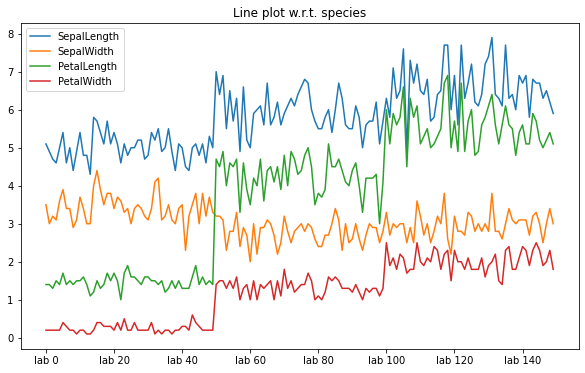

In [57]:
ax = iris.plot(figsize=(10, 6))  # Columns vs index
ax.set_title("Line plot w.r.t. species");

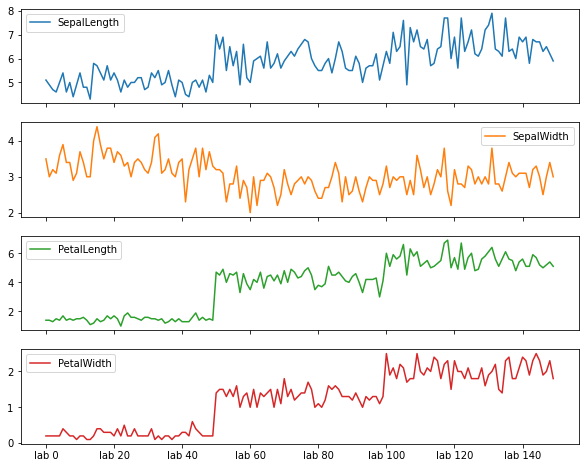

In [58]:
iris.plot(subplots=True, figsize=(10, 8));  # Columns vs index

### Histogram

Text(0.5, 0, 'in cm')

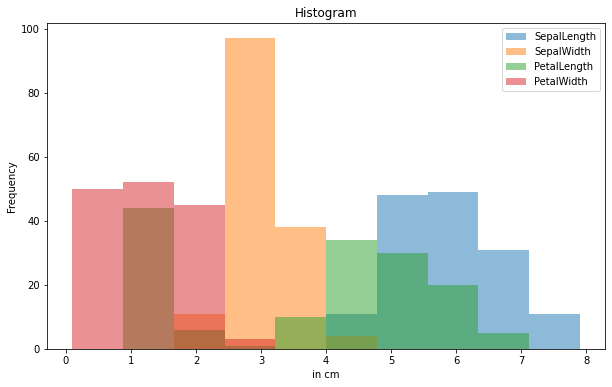

In [59]:
ax = iris.plot.hist(alpha=0.5, figsize=(10, 6))
ax.set_title("Histogram");
ax.set_xlabel("in cm")

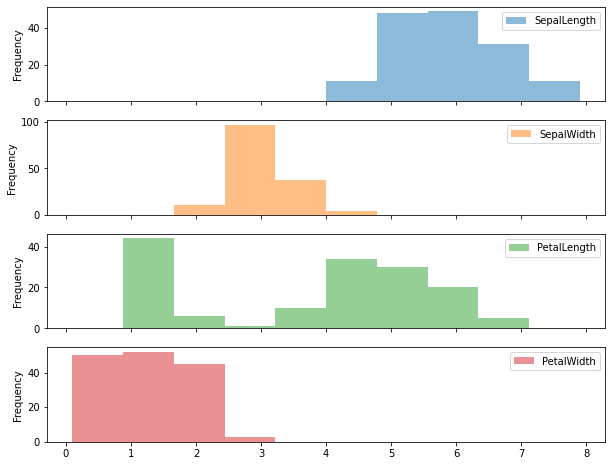

In [60]:
iris.plot.hist(alpha=0.5, subplots=True, figsize=(10, 8));

### Scatter plot

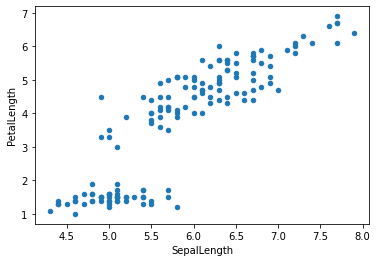

In [61]:
iris.plot.scatter(x="SepalLength", y="PetalLength");

# Exercices <a name="E"></a>

## Exercice 1:

- Import the dataset `defra_consumption` (you can first download it from my website). You should have the following first 5 rows:

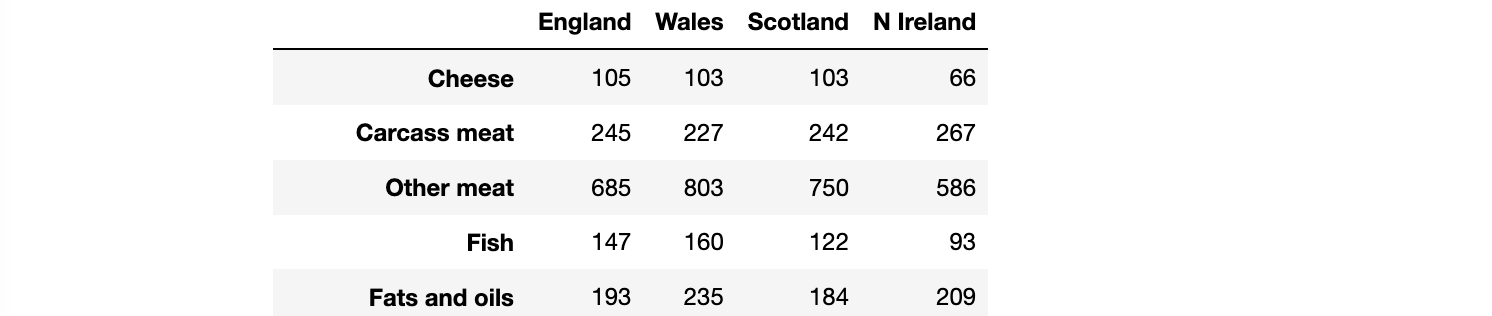


- How many rows/columns, quantitative/qualitative features do we have in this dataset ?

- Extract the following subtable:

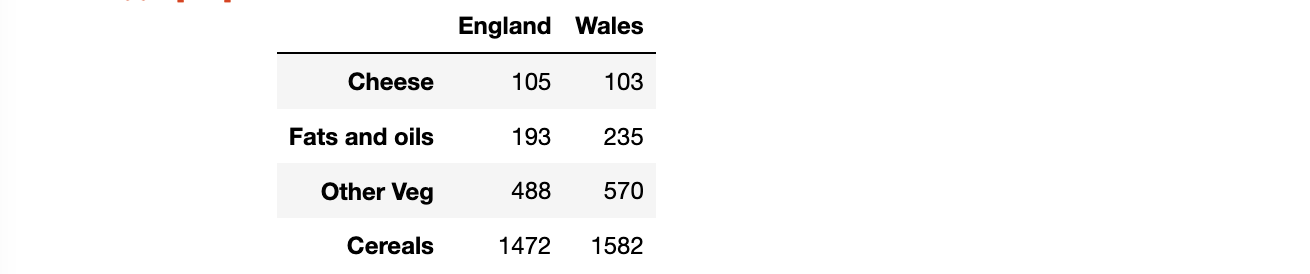

## Exercice 2:

With the dataset imported from exercice 1, generate the following figure:

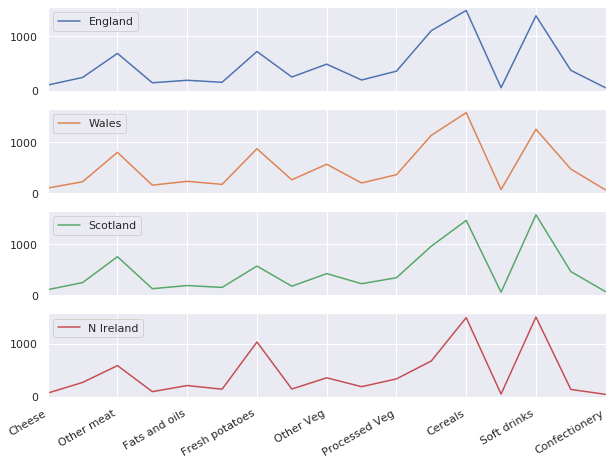

## Exercice 3: Additional plots

Thanks to the dataset `iris_plus` previously generated,

- Plot the following **horizontal bar chart**:

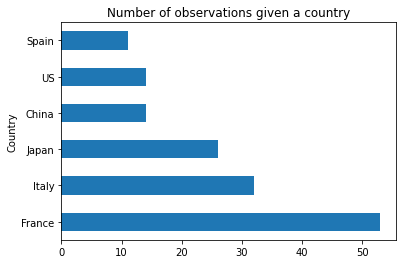

- Plot the following **pie chart** (you can use tools from matplotlib package):

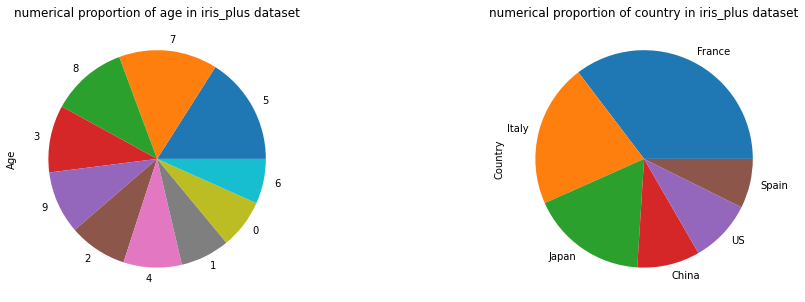

## Exercice 4:

From the dataset `iris` (or `iris_plus`), find out the average values of `SepalLength` and `SepalWidth` of all three species.